<a href="https://colab.research.google.com/github/Gitjesus22/Meta-gen-mica/blob/main/Analisis_de_diversidad_con_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="middle">
<img src="https://solariabiodata.com.mx/wp-content/uploads/2021/07/logo_red.png" alt="Soluciones de siguiente generacion" width=350/>
  <img src="https://user-images.githubusercontent.com/54455898/172992604-1fb50c5f-5119-4d17-be82-3eabf19c4414.png" width=350/> 
</p>






# Analisis de diversidad en R
En esta práctica ocuparemos del lenguaje de programación R para implementar diversos paquetes de diversidad, algunos de ellos vistos en actividades anteriores para retroalimentarnos.

# Comencemos con la instalación de librerías

Activamos la librería de ***ggplot2***: 



In [ ]:
library(ggplot2)

Debemos tener instalado ***reshape2***, el cual facilita la transformación de datos entre los formatos a lo largo y ancho:

In [ ]:
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’




In [ ]:
library(reshape2)

Intalamos ***BiocManager*** para tener un mejor análisis estadístico y la comprensión de datos genómicos a paritr de otros paquetes como ***phyloseq***:

In [ ]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("phyloseq")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.0 (2022-04-22)

Installing package(s) 'BiocVersion', 'phyloseq'

also installing the dependencies ‘bitops’, ‘Rhdf5lib’, ‘rhdf5filters’, ‘zlibbioc’, ‘RCurl’, ‘GenomeInfoDbData’, ‘pixmap’, ‘sp’, ‘rhdf5’, ‘S4Vectors’, ‘IRanges’, ‘XVector’, ‘GenomeInfoDb’, ‘iterators’, ‘permute’, ‘ade4’, ‘ape’, ‘Biobase’, ‘BiocGenerics’, ‘biomformat’, ‘Biostrings’, ‘foreach’, ‘igraph’, ‘multtest’, ‘vegan’


Old packages: 'dbplyr', 'processx'



In [ ]:
library(phyloseq)

Instalamos el paquete de ***lattice*** para permitir un fácil acondicionamiento sobre los datos y producir ***múltiples gráficos pequeños***: 

In [ ]:
install.packages("lattice")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



***Permute*** proporciona funciones para generar permutaciones restringidas y no restringidas:

In [ ]:
install.packages("permute")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(permute)

Con ***vegan*** podemos visualizar mejor los análisis de divesidad que se mostrarán más adelante:

In [ ]:
install.packages("vegan")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(vegan)

Loading required package: lattice

This is vegan 2.6-2



Instalamos ***dplyr***:

In [ ]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Cargamos la tabla de los datos 

In [ ]:
datos <-read.table("/content/sample_data/Abundance.tsv", sep="\t", header=T, row.names=1)

In [ ]:
head(datos)

,SRR10095342,SRR3050168,SRR3961733,SRR3961734,SRR3961739,SRR5214706,SRR790522,SRR816113699
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Rhodococcus erythropolis,2,17,3,4,2,2,13,5
Rhodococcus erythropolis SK121,0,1,0,0,0,0,0,0
Rhodococcus erythropolis DN1,0,0,0,0,0,0,0,0
Rhodococcus erythropolis PR4,0,1,0,0,0,0,1,0
Rhodococcus erythropolis CCM2595,0,0,1,0,0,0,0,0
Rhodococcus qingshengii,0,3,1,0,0,1,5,0


#Obtenemos la tabla de abundancia relativa 

In [ ]:
prop<-prop.table(data.matrix(datos), 2)

#Con la función melt convertimos la tabla en un data frame


In [ ]:
dat_m <- melt(prop)

In [ ]:
head(dat_m)

,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,Rhodococcus erythropolis,SRR10095342,0.02564103
2,Rhodococcus erythropolis SK121,SRR10095342,0.00000000
3,Rhodococcus erythropolis DN1,SRR10095342,0.00000000
4,Rhodococcus erythropolis PR4,SRR10095342,0.00000000
5,Rhodococcus erythropolis CCM2595,SRR10095342,0.00000000
6,Rhodococcus qingshengii,SRR10095342,0.00000000


#Adicionamos nombres a las columnas

In [ ]:
colnames(dat_m)<-c("Specie", "Sample", "Abundance")

#Realizamos una gráfica apilada de las abundacias relativas con ggplot2

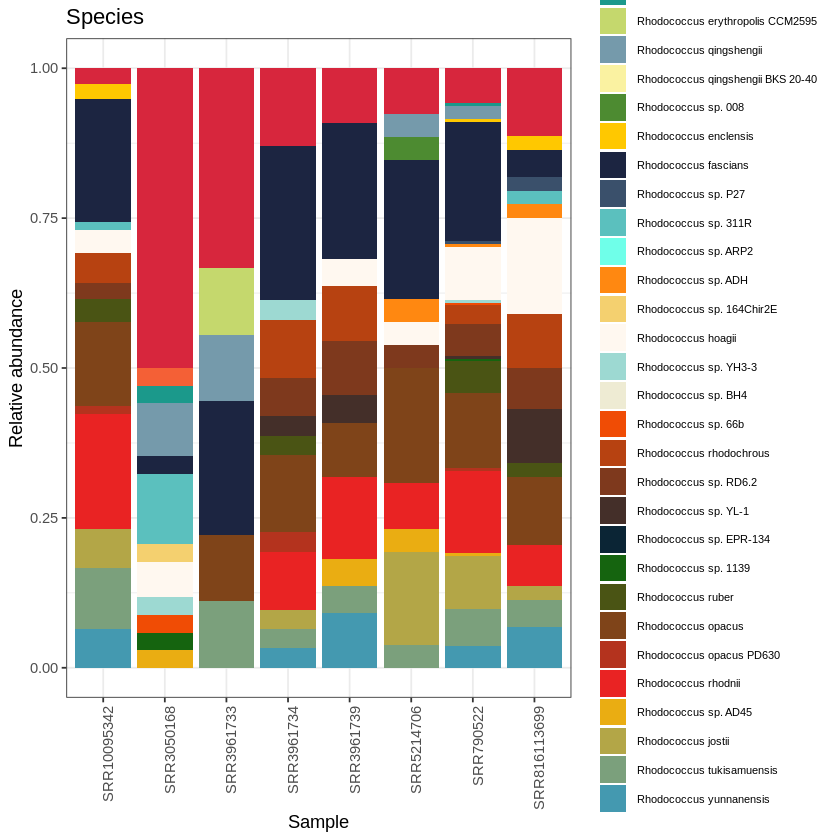

In [ ]:
 ggplot(dat_m, aes(Sample, Abundance, fill =Specie )) +
   geom_bar(stat = "identity")+xlab("Sample")+
   ylab("Relative abundance")+theme_bw()+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+
   theme(legend.text=element_text(size=rel(0.6)))+ggtitle("Species")+
   theme(legend.position = "right",legend.direction = "vertical")+
   scale_fill_manual(values = c("#d7263d","#f46036","#2e294e","#1b998b","#c5d86d","#759aab","#faf2a1","#4d8b31","#ffc800",
   "#1c2541","#3a506b","#5bc0be","#6fffe9","#ff8811","#f4d06f","#fff8f0","#9dd9d2","#eeebd3",
   "#F04C05","#B74211","#7E391D","#442F29","#0B2535","#15640F","#4A5414","#7F4419","#B4331E","#E92323",
   "#EAAD12","#B3A647","#7BA07C","#4499B0","#0C92E5","#5BF30A","#60B835","#667C61","#6B418C","#7005B7",
   "#F44E4E","#B96669","#7D7D83","#42959E","#06ACB8","#EF745C","#D06257","#B15052","#923E4D","#722B47","#531942","#34073D",
   "#074170","#1B4E60","#2F5B51","#436941","#567631","#6A8322","#7E9012","#8ecae6","#219ebc","#023047","#ffb703","#fb8500",
   "#f6d7d7","#df7472","#53032b","#2d0627","#06262c","#72dddf","#0fd780","#2b5403","#a6df72","#c9d70f",
   "#a09ebb","#a8aec1","#b5d2cb","#bfffbc","#a6ffa1","#476a6f","#031a6b","#033860","#004385","#305252",
   "#160f29","#246a73","#368f8b","#f3dfc1","#ddbea8","#ea526f","#e76b74","#d7af70","#c9c19f","#edf7d2",
   "#f94144","#f3722c","#f8961e","#f9844a","#f9c74f","#90be6d","#43aa8b","#4d908e","#577590","#277da1"))+ guides(fill = guide_legend(nrow = 34))

#Obtención de índices de diversidad Alfa con ***phyloseq***

Con la función de "sample_data" de ***phyloseq*** introducimos los metadatos:

In [ ]:
metadata<-read.table("/content/sample_data/sampledata.txt",sep="\t", header=T, row.names=1)
samples = sample_data(metadata)
samples

,Site,Deep
,<chr>,<int>
SRR10095342,India,18
SRR3050168,Mexico,29
SRR3961733,Asia,29
SRR3961734,Singapur,20
SRR3961739,India,11
SRR5214706,Japon,10
SRR790522,Mexico,10
SRR816113699,Indira,19


# Visualizamos como se encuentran organizado los datos

In [ ]:
head (datos)

,SRR10095342,SRR3050168,SRR3961733,SRR3961734,SRR3961739,SRR5214706,SRR790522,SRR816113699
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Rhodococcus erythropolis,2,17,3,4,2,2,13,5
Rhodococcus erythropolis SK121,0,1,0,0,0,0,0,0
Rhodococcus erythropolis DN1,0,0,0,0,0,0,0,0
Rhodococcus erythropolis PR4,0,1,0,0,0,0,1,0
Rhodococcus erythropolis CCM2595,0,0,1,0,0,0,0,0
Rhodococcus qingshengii,0,3,1,0,0,1,5,0


In [ ]:
OTU <- otu_table(datos, taxa_are_rows = TRUE)
GP <- prune_species(speciesSums(physeq1) > 0, OTU) 
GP


Warning message:
“'prune_species' is deprecated.
Use 'prune_taxa' instead.
See help("Deprecated") and help("phyloseq-deprecated").”
Warning message:
“'speciesSums' is deprecated.
Use 'taxa_sums' instead.
See help("Deprecated") and help("phyloseq-deprecated").”


ERROR: ignored

# Construimos un objeto a partir de los OTUs y las muestras:

In [ ]:
objetophy<-phyloseq(OTU,samples)
objetophy

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 32 taxa and 8 samples ]
sample_data() Sample Data:       [ 8 samples by 2 sample variables ]

#Graficamos los índices 

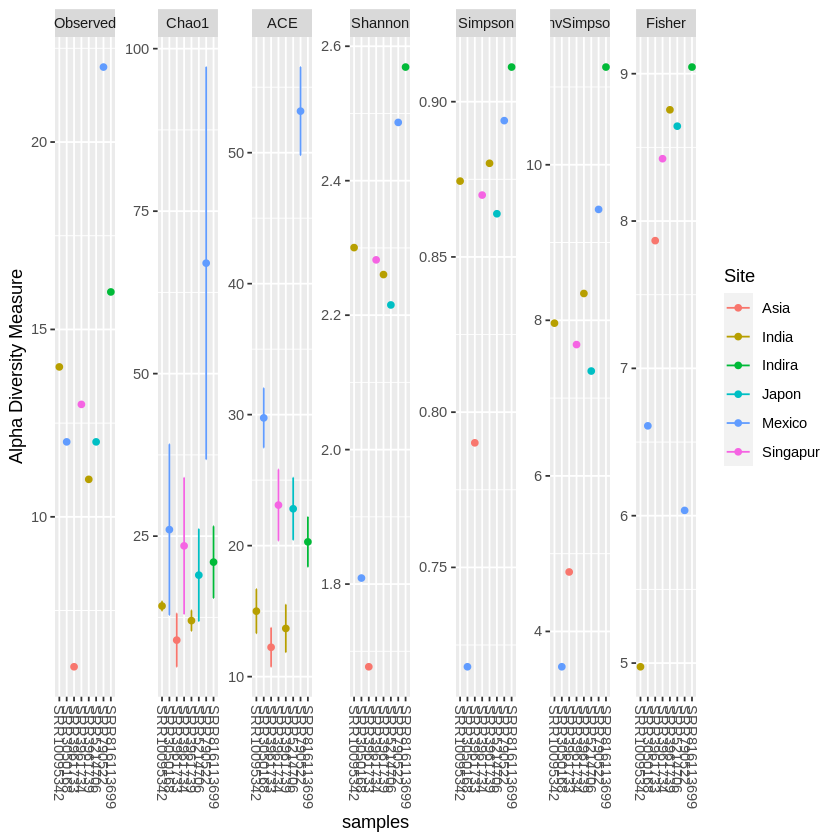

In [ ]:
plot_richness(objetophy, color="Site") 

# Podemos extraer ciertas columnas y visualizarlas mejor


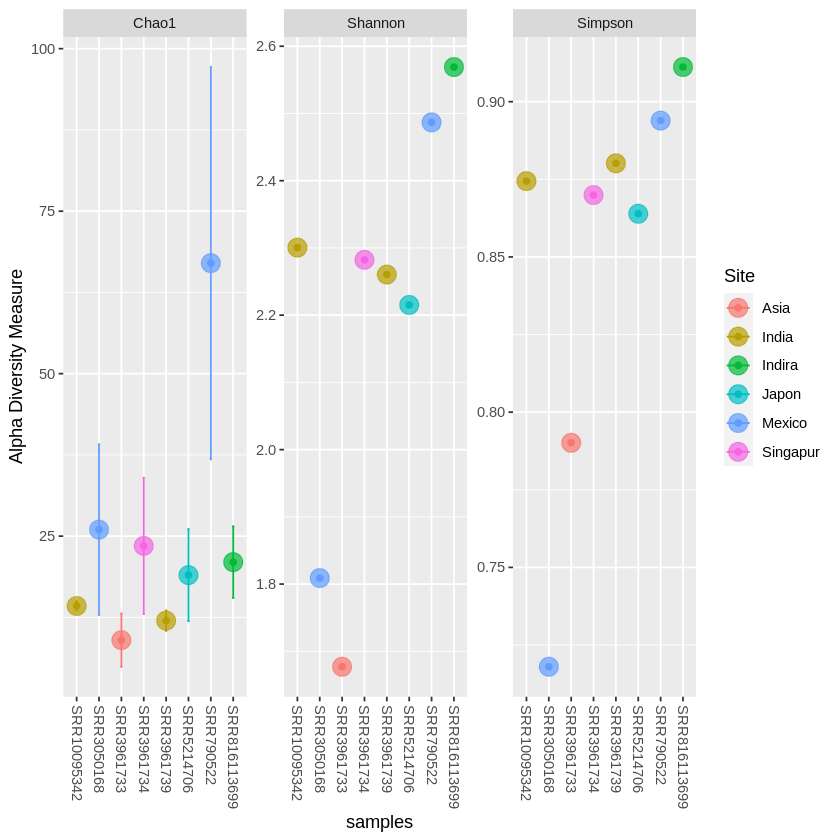

In [ ]:
plot_richness(objetophy, measures=c("Chao1", "Shannon", "Simpson"),color="Site") + geom_point(size=5, alpha=0.7)

#Calculamos la diversidad Beta
Primero se calcula la matriz de distancia ***Bray-Curtis***:

In [ ]:
dist_bc <- as.matrix(vegdist(OTU, method = "bray"))

Warning message in vegdist(OTU, method = "bray"):
“you have empty rows: their dissimilarities may be
                 meaningless in method “bray””
Warning message in vegdist(OTU, method = "bray"):
“missing values in results”


### A partir de ***Bray-Curtis*** obtenemos la raíz cuadrada y con ello convertir las distancias en métricas


In [ ]:
dist_bc_sqrt <- sqrt (dist_bc)

In [ ]:
pcoa_bc = ordinate(objetophy, "PCoA", "bray") 

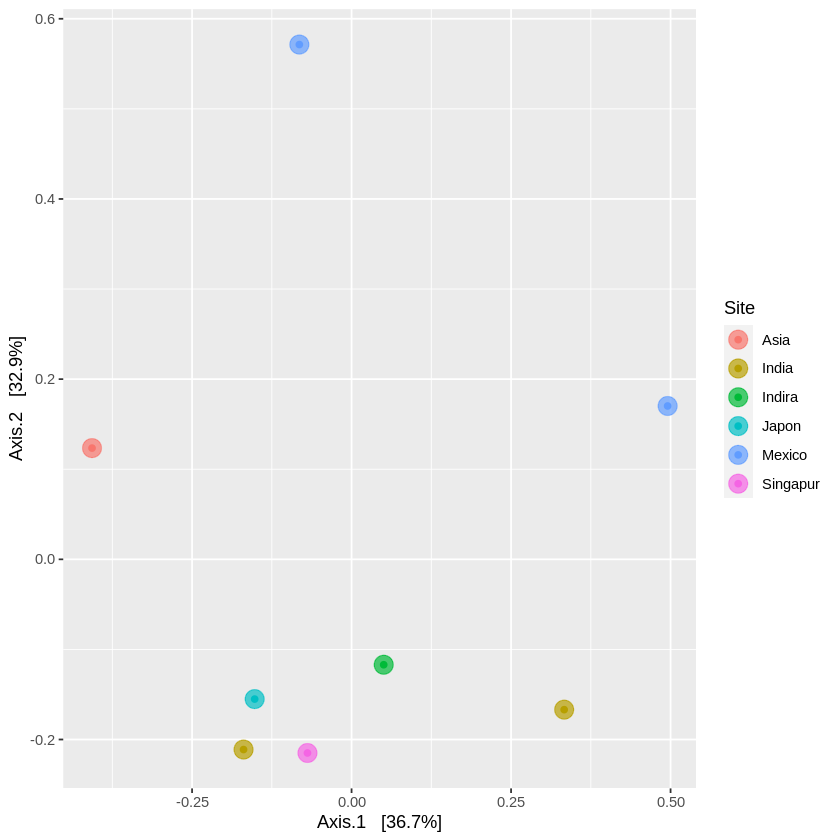

In [ ]:
plot_ordination(objetophy, pcoa_bc, color = "Site") + geom_point(size=5, alpha=0.7)

# Generamos un ***heatmap*** con base al objeto que se creó anteriormente


Warning message:
“Transformation introduced infinite values in discrete y-axis”


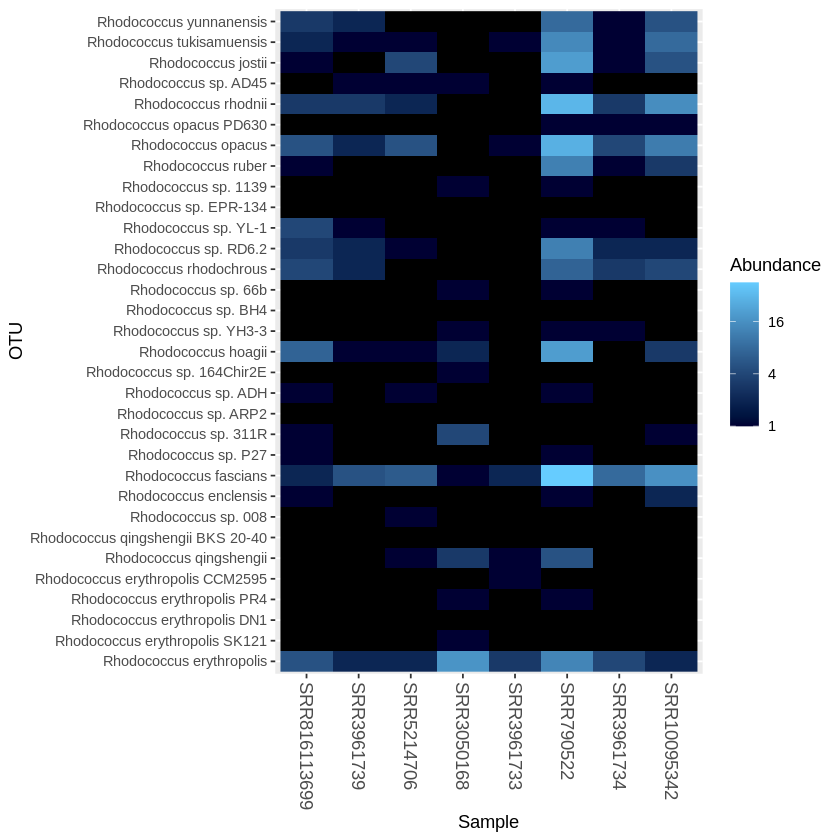

In [ ]:
plot_heatmap(objetophy)

### Importancia de R en el análisis de datos ***shotgun***

La gran cantidad de datos ***shotgun*** metagenómicos requieren canalizaciones integrales, fáciles de usar, como lo son diversos paquetes de ***R*** y con ello obtener mejores análisis a partir este tipo de ***metainformación***, que aceleran los pasos de la bioinformática, liberando a los investigadores la necesidad de realizar manualmente tareas complejas y que consumen mucho tiempo.